In [103]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import pandas as pd
import matplotlib.pyplot as plt

#from sklearn.model_selection import train_test_split

#dataset_path = r"C:\Users\Dell\Documents\PhD\Semester 3\Pebelejaran Mesin Lanjut\Tugas\boston.csv"
#boston = pd.read_csv(dataset_path)

#boston.head()

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path="boston_housing.npz", test_split=0.2, seed=113
)

x_train_df = pd.DataFrame(x_train, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
x_test_df = pd.DataFrame(x_test, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
y_train_df = pd.DataFrame(y_train, columns=['MEDV'])
y_test_df = pd.DataFrame(y_test, columns=['MEDV'])
#y_train_df.head()
#y_train_df.shape

In [104]:
x_train_df['MEDV'] = y_train_df
x_test_df['MEDV'] = y_test_df
#x_train_df.shape

In [19]:
x_train_df['MEDV'].describe()

count    404.000000
mean      22.395050
std        9.210442
min        5.000000
25%       16.675000
50%       20.750000
75%       24.800000
max       50.000000
Name: MEDV, dtype: float64

In [105]:
#x = boston[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
#y = boston['MEDV']

#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(14,)))#,
                               #kernel_regularizer=tf.keras.regularizers.L2()))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(64, activation='relu')),
model.add(tf.keras.layers.Dense(512, activation='tanh')),
model.add(tf.keras.layers.Dense(64, activation='relu')),
model.add(tf.keras.layers.Dense(64, activation='relu')),
model.add(tf.keras.layers.Dense(512, activation='sigmoid')),
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 64)                960       
                                                                 
 dense_64 (Dense)            (None, 64)                4160      
                                                                 
 dense_65 (Dense)            (None, 512)               33280     
                                                                 
 dense_66 (Dense)            (None, 64)                32832     
                                                                 
 dense_67 (Dense)            (None, 64)                4160      
                                                                 
 dense_68 (Dense)            (None, 512)               33280     
                                                                 
 dense_69 (Dense)            (None, 1)                

In [138]:
model.compile(loss='log_cosh',
             optimizer='Adam',
             metrics=['log_cosh'])

In [139]:
from datetime import datetime
start_time = datetime.now()

history = model.fit(x_train_df, y_train,
                    epochs=200, batch_size=64)#,
                    #validation_split=0.2)
end_time = datetime.now()

history.history

Epoch 1/200
7/7 [==============================] - 1s 4ms/step - loss: 25.6989 - log_cosh: 25.6989
Epoch 2/200
7/7 [==============================] - 0s 6ms/step - loss: 11.7881 - log_cosh: 11.7881
Epoch 3/200
7/7 [==============================] - 0s 5ms/step - loss: 4.2730 - log_cosh: 4.2730
Epoch 4/200
7/7 [==============================] - 0s 5ms/step - loss: 4.2039 - log_cosh: 4.2039
Epoch 5/200
7/7 [==============================] - 0s 4ms/step - loss: 3.7786 - log_cosh: 3.7786
Epoch 6/200
7/7 [==============================] - 0s 5ms/step - loss: 3.1339 - log_cosh: 3.1339
Epoch 7/200
7/7 [==============================] - 0s 5ms/step - loss: 2.5268 - log_cosh: 2.5268
Epoch 8/200
7/7 [==============================] - 0s 5ms/step - loss: 1.9327 - log_cosh: 1.9327
Epoch 9/200
7/7 [==============================] - 0s 4ms/step - loss: 1.5745 - log_cosh: 1.5745
Epoch 10/200
7/7 [==============================] - 0s 5ms/step - loss: 1.4233 - log_cosh: 1.4233
Epoch 11/200
7/7 [=======

{'loss': [25.698877334594727,
  11.788131713867188,
  4.273031234741211,
  4.203910827636719,
  3.7785770893096924,
  3.1338956356048584,
  2.5267622470855713,
  1.9327222108840942,
  1.574480414390564,
  1.4232970476150513,
  1.2683874368667603,
  1.157728910446167,
  1.0664875507354736,
  0.978538990020752,
  0.9598549604415894,
  0.9081720113754272,
  0.8618826270103455,
  0.8509214520454407,
  0.8392142057418823,
  0.7889745831489563,
  0.7133567929267883,
  0.6431105136871338,
  0.5927974581718445,
  0.5849998593330383,
  0.5720653533935547,
  0.5231227278709412,
  0.5092049241065979,
  0.4765127897262573,
  0.49719706177711487,
  0.4820140302181244,
  0.4767182469367981,
  0.4875739812850952,
  0.41172295808792114,
  0.46675896644592285,
  0.42806529998779297,
  0.39345988631248474,
  0.38189372420310974,
  0.37519654631614685,
  0.3479779362678528,
  0.3063172996044159,
  0.33296459913253784,
  0.32093891501426697,
  0.2648765444755554,
  0.25741538405418396,
  0.231696441769599

In [140]:
result = model.evaluate(x_test_df, y_test)
print('Loss, Accuracy: ', result)
print('Training Duration: {}'.format(end_time - start_time))

4/4 [==============================] - 0s 2ms/step - loss: 0.2979 - log_cosh: 0.2979
Loss, Accuracy:  [0.29788848757743835, 0.29788848757743835]
Training Duration: 0:00:11.333278


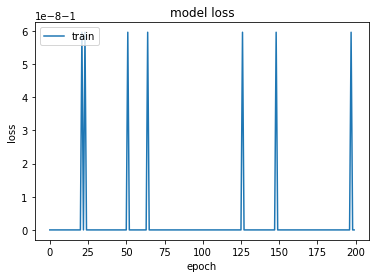

In [137]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()